In [1]:
import os, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
569,China,2006,Developing,74.2,98.0,307,3.28,29.743430,91.0,99602,...,94.0,4.52,93.0,0.1,299.229676,13112.0,4.8,4.3,0.646,11.0
2432,Spain,2008,Developed,81.3,7.0,2,10.24,5596.535203,97.0,297,...,97.0,8.80,97.0,0.1,35578.736190,4595416.0,0.6,0.5,0.854,16.1
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2090,Republic of Korea,2012,Developing,81.2,69.0,1,9.56,0.000000,99.0,2,...,99.0,7.10,99.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN
166,Bahamas,2009,Developing,74.6,168.0,0,9.29,0.000000,95.0,0,...,97.0,7.43,96.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6


In [3]:
data.shape

(2938, 22)

In [4]:
data.isnull().sum()[data.isnull().sum()>0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
countries = data['Country'].unique()

na_cols = ['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP',
          'Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources']

for col in na_cols:
    for country in countries:
        data.loc[data['Country']==country,col] = data.loc[data['Country']==country,col]\
        .fillna(data[data['Country'] == country][col].mean())

In [23]:
data.isnull().sum()[data.isnull().sum()>0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                             17
Hepatitis B                        144
 BMI                                34
Total expenditure                   32
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [24]:
data = data.dropna()

In [25]:
data.shape

(2128, 22)

In [26]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [27]:
data['Country'].value_counts()

Montenegro             16
Nigeria                16
Afghanistan            16
Trinidad and Tobago    16
Zimbabwe               16
                       ..
Croatia                16
Ghana                  16
Sri Lanka              16
Russian Federation     16
Gabon                  16
Name: Country, Length: 133, dtype: int64

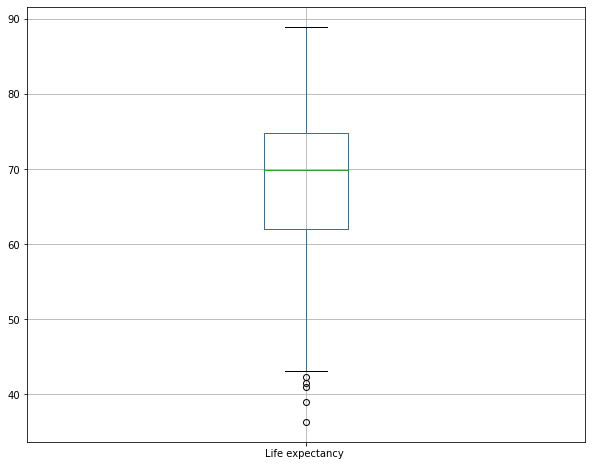

In [33]:
plt.figure(figsize = (10,8))

data.boxplot('Life expectancy ')

plt.show()

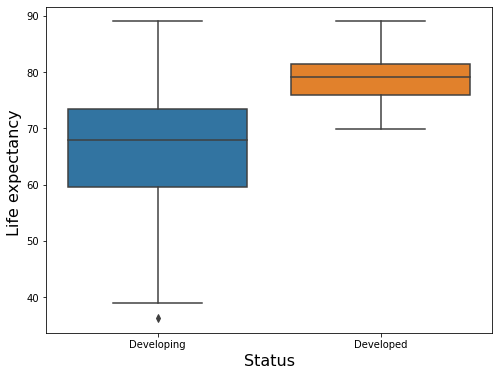

In [34]:
plt.figure(figsize = (8,6))

sns.boxplot('Status','Life expectancy ',data = data)

plt.xlabel('Status',fontsize = 16)
plt.ylabel('Life expectancy ', fontsize = 16)

plt.show()

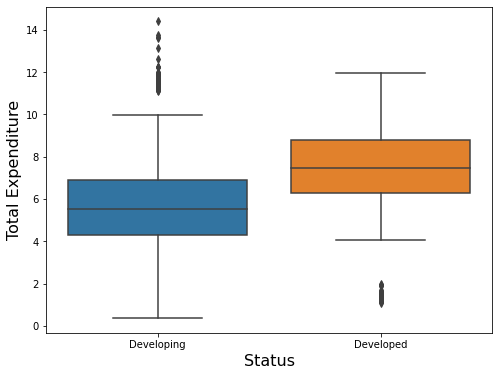

In [36]:
plt.figure(figsize = (8,6))

sns.boxplot('Status', 'Total expenditure', data = data)

plt.xlabel('Status',fontsize = 16)
plt.ylabel('Total Expenditure', fontsize = 16)

plt.show()

In [37]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [38]:
data_corr = data[['Life expectancy ','Adult Mortality','Schooling','Total expenditure','Diphtheria ','GDP','Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


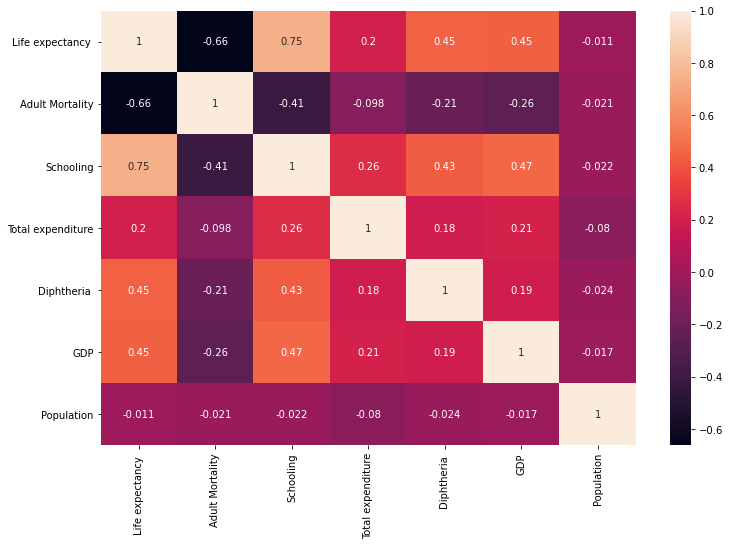

In [39]:
fig, ax = plt.subplots(figsize = (12,8))

sns.heatmap(data_corr , annot = True)

plt.show()

In [45]:
features = data.drop('Life expectancy ',axis = 1)
target = data[['Life expectancy ']]

In [46]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [47]:
target.sample(5)

,Life expectancy
1742,73.6
2693,71.6
419,58.0
2372,67.1
2017,72.8


In [48]:
features = features.drop('Country', axis = 1)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [49]:
categorical_features = features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [50]:
categorical_features = pd.get_dummies(categorical_features)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [52]:
numeric_features = features.drop(['Status'], axis = 1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [53]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [54]:
sc = StandardScaler()

numeric_features = pd.DataFrame(sc.fit_transform(numeric_features),columns = numeric_features.columns,
                               index = numeric_features.index)

In [55]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [56]:
processed_features = pd.concat([numeric_features,categorical_features], axis = 1, sort = False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [57]:
processed_features.shape

(2128, 21)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(processed_features,target,test_size = 0.2,random_state = 1)

In [61]:
(x_train.shape,x_test.shape),(y_train.shape,y_test.shape)

(((1702, 21), (426, 21)), ((1702, 1), (426, 1)))

In [69]:
def build_single_layer_model():
    
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'sigmoid'))
    
    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model

In [70]:
model = build_single_layer_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [72]:
# tf.keras.utils.plot_model(model)

In [73]:
num_epochs = 100

training_history = model.fit(x_train,y_train, epochs = num_epochs, validation_split = 0.2, verbose = True)

Epoch 1/100
43/43 [==============================] - 0s 4ms/step - loss: 4237.0342 - mae: 64.4434 - mse: 4237.0342 - val_loss: 3649.5989 - val_mae: 59.8219 - val_mse: 3649.5989
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 3014.6401 - mae: 54.1238 - mse: 3014.6401 - val_loss: 2323.4929 - val_mae: 47.4533 - val_mse: 2323.4929
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 1718.1921 - mae: 40.3860 - mse: 1718.1921 - val_loss: 1156.4230 - val_mae: 33.0821 - val_mse: 1156.4230
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 781.7198 - mae: 26.5254 - mse: 781.7198 - val_loss: 483.9651 - val_mae: 20.5707 - val_mse: 483.9651
Epoch 5/100
43/43 [==============================] - 0s 973us/step - loss: 319.7832 - mae: 16.0922 - mse: 319.7832 - val_loss: 199.8349 - val_mae: 12.4067 - val_mse: 199.8349
Epoch 6/100
43/43 [==============================] - 0s 881us/step - loss: 136.9485 - mae: 9.9505 - mse: 136.9485 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 6.5191 - mae: 1.8394 - mse: 6.5191 - val_loss: 8.0399 - val_mae: 1.9810 - val_mse: 8.0399
Epoch 49/100
43/43 [==============================] - 0s 1ms/step - loss: 6.4892 - mae: 1.8398 - mse: 6.4892 - val_loss: 7.7960 - val_mae: 1.9621 - val_mse: 7.7960
Epoch 50/100
43/43 [==============================] - 0s 1ms/step - loss: 6.3348 - mae: 1.8097 - mse: 6.3348 - val_loss: 7.7938 - val_mae: 1.9344 - val_mse: 7.7938
Epoch 51/100
43/43 [==============================] - 0s 1ms/step - loss: 6.2414 - mae: 1.7817 - mse: 6.2414 - val_loss: 7.6948 - val_mae: 1.9254 - val_mse: 7.6948
Epoch 52/100
43/43 [==============================] - 0s 1ms/step - loss: 6.1860 - mae: 1.7751 - mse: 6.1860 - val_loss: 7.5944 - val_mae: 1.9226 - val_mse: 7.5944
Epoch 53/100
43/43 [==============================] - 0s 1ms/step - loss: 6.1047 - mae: 1.7645 - mse: 6.1047 - val_loss: 7.5602 - val_mae: 1.9093 - val_mse: 7.5602
Epoch 54/100
43/43 [=========

Epoch 98/100
43/43 [==============================] - 0s 1ms/step - loss: 4.4624 - mae: 1.5009 - mse: 4.4624 - val_loss: 5.9990 - val_mae: 1.7032 - val_mse: 5.9990
Epoch 99/100
43/43 [==============================] - 0s 1ms/step - loss: 4.5599 - mae: 1.5304 - mse: 4.5599 - val_loss: 5.9171 - val_mae: 1.6708 - val_mse: 5.9171
Epoch 100/100
43/43 [==============================] - 0s 997us/step - loss: 4.4896 - mae: 1.5180 - mse: 4.4896 - val_loss: 6.0413 - val_mae: 1.6966 - val_mse: 6.0413


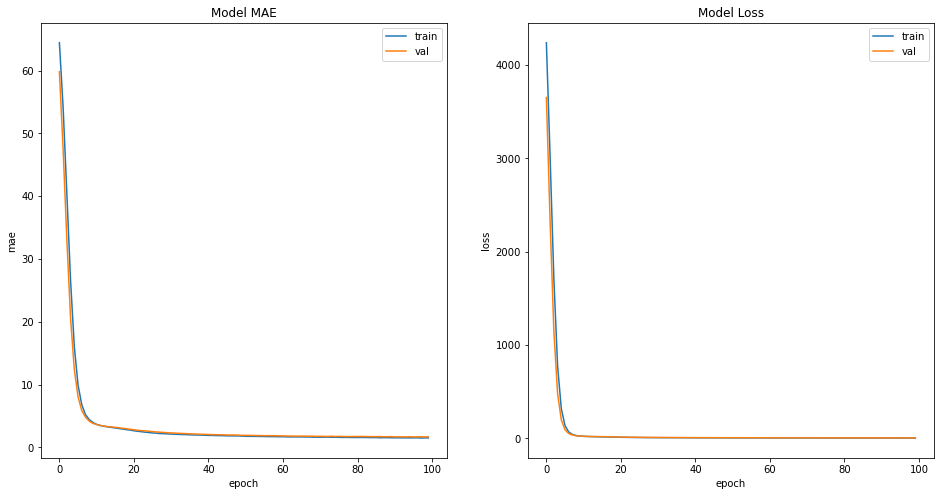

In [74]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)

plt.plot(training_history.history['mae'])
plt.plot(training_history.history['val_mae'])

plt.title('Model MAE')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train','val'])

plt.subplot(1,2,2)

plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [75]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 642us/step - loss: 6.3628 - mae: 1.8317 - mse: 6.3628


[6.362816333770752, 1.8317062854766846, 6.362816333770752]

In [76]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9295117943491943

In [79]:
pred_results = pd.DataFrame({'y_test':y_test.values.flatten(),'y_pred':y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
33,79.7,77.637772
64,69.5,74.444580
410,59.2,63.751957
182,51.2,52.792690
89,54.1,54.770470
50,67.7,68.316437
330,78.7,76.927788
388,82.5,83.127579
70,77.8,77.277878
219,78.0,74.689369


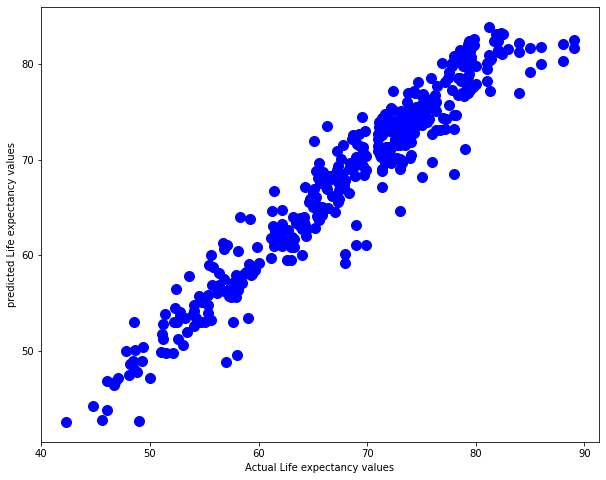

In [80]:
plt.figure(figsize = (10,8))

plt.scatter(y_test, y_pred, s=100, c = 'blue')

plt.xlabel('Actual Life expectancy values')
plt.ylabel('predicted Life expectancy values')

plt.show()

In [83]:
def build_multiple_layer_model():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                             layers.Dense(16, activation = 'relu'),
                             layers.Dense(4, activation = 'relu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model

In [84]:
model = build_multiple_layer_model()

In [86]:
# tf.keras.utils.plot_model(model, show_shapes = True)

In [87]:
!rm -rf seq_logs
!ls -1

'rm' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
logdir = os.path.join("seq_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [92]:
training_history = model.fit(x_train,
                            y_train,
                            validation_split = 0.2,
                             epochs = 500,
                             batch_size = 100,
                             callbacks = [tensorboard_callback])

Epoch 1/500
 1/14 [=>............................] - ETA: 0s - loss: 4669.8516 - mae: 67.6474 - mse: 4669.8516WARNING:tensorflow:From C:\Users\G ANIL\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
14/14 [==============================] - 2s 136ms/step - loss: 4689.1934 - mae: 67.7623 - mse: 4689.1929 - val_loss: 4676.8433 - val_mae: 67.6729 - val_mse: 4676.8433
Epoch 2/500
14/14 [==============================] - 0s 9ms/step - loss: 4638.8179 - mae: 67.3797 - mse: 4638.8179 - val_loss: 4622.7227 - val_mae: 67.2559 - val_mse: 4622.7227
Epoch 3/500
14/14 [==============================] - 0s 11ms/step - loss: 4572.3687 - mae: 66.8678 - mse: 4572.3687 - val_loss: 4544.9487 - val_mae: 66.6505 - val_mse: 4544.9487
Epoch 4/500
14/14 [==============================] - 0s 11ms/step - loss: 4478.8599 -

Epoch 44/500
14/14 [==============================] - 0s 6ms/step - loss: 54.3490 - mae: 5.6986 - mse: 54.3490 - val_loss: 55.8960 - val_mae: 5.7833 - val_mse: 55.8960
Epoch 45/500
14/14 [==============================] - 0s 6ms/step - loss: 53.1263 - mae: 5.6327 - mse: 53.1263 - val_loss: 54.7379 - val_mae: 5.7299 - val_mse: 54.7379
Epoch 46/500
14/14 [==============================] - 0s 6ms/step - loss: 51.8217 - mae: 5.5584 - mse: 51.8217 - val_loss: 53.5068 - val_mae: 5.6644 - val_mse: 53.5068
Epoch 47/500
14/14 [==============================] - 0s 6ms/step - loss: 50.5741 - mae: 5.4875 - mse: 50.5741 - val_loss: 52.5243 - val_mae: 5.6103 - val_mse: 52.5243
Epoch 48/500
14/14 [==============================] - 0s 6ms/step - loss: 49.3262 - mae: 5.4192 - mse: 49.3262 - val_loss: 51.3957 - val_mae: 5.5503 - val_mse: 51.3957
Epoch 49/500
14/14 [==============================] - 0s 6ms/step - loss: 48.2241 - mae: 5.3497 - mse: 48.2241 - val_loss: 50.3880 - val_mae: 5.5022 - val_mse: 

Epoch 93/500
14/14 [==============================] - 0s 6ms/step - loss: 19.9931 - mae: 3.3507 - mse: 19.9931 - val_loss: 23.0765 - val_mae: 3.5822 - val_mse: 23.0765
Epoch 94/500
14/14 [==============================] - 0s 6ms/step - loss: 19.7326 - mae: 3.3203 - mse: 19.7326 - val_loss: 22.8853 - val_mae: 3.5829 - val_mse: 22.8853
Epoch 95/500
14/14 [==============================] - 0s 6ms/step - loss: 19.3986 - mae: 3.3008 - mse: 19.3986 - val_loss: 22.5099 - val_mae: 3.5468 - val_mse: 22.5099
Epoch 96/500
14/14 [==============================] - 0s 6ms/step - loss: 19.1407 - mae: 3.2744 - mse: 19.1407 - val_loss: 22.2486 - val_mae: 3.5325 - val_mse: 22.2486
Epoch 97/500
14/14 [==============================] - 0s 7ms/step - loss: 18.8308 - mae: 3.2442 - mse: 18.8308 - val_loss: 21.9235 - val_mae: 3.4977 - val_mse: 21.9235
Epoch 98/500
14/14 [==============================] - 0s 6ms/step - loss: 18.6104 - mae: 3.2278 - mse: 18.6104 - val_loss: 21.5837 - val_mae: 3.4618 - val_mse: 

14/14 [==============================] - 0s 6ms/step - loss: 11.7757 - mae: 2.5478 - mse: 11.7757 - val_loss: 13.9295 - val_mae: 2.6866 - val_mse: 13.9295
Epoch 142/500
14/14 [==============================] - 0s 6ms/step - loss: 11.6893 - mae: 2.5360 - mse: 11.6893 - val_loss: 13.8069 - val_mae: 2.6827 - val_mse: 13.8069
Epoch 143/500
14/14 [==============================] - 0s 6ms/step - loss: 11.5732 - mae: 2.5199 - mse: 11.5732 - val_loss: 13.6973 - val_mae: 2.6712 - val_mse: 13.6973
Epoch 144/500
14/14 [==============================] - 0s 6ms/step - loss: 11.4877 - mae: 2.5087 - mse: 11.4877 - val_loss: 13.6108 - val_mae: 2.6622 - val_mse: 13.6108
Epoch 145/500
14/14 [==============================] - 0s 7ms/step - loss: 11.4809 - mae: 2.5165 - mse: 11.4809 - val_loss: 13.4595 - val_mae: 2.6387 - val_mse: 13.4595
Epoch 146/500
14/14 [==============================] - 0s 6ms/step - loss: 11.4003 - mae: 2.4986 - mse: 11.4003 - val_loss: 13.3995 - val_mae: 2.6407 - val_mse: 13.3995


Epoch 190/500
14/14 [==============================] - 0s 6ms/step - loss: 9.1531 - mae: 2.2362 - mse: 9.1531 - val_loss: 10.2376 - val_mae: 2.2632 - val_mse: 10.2376
Epoch 191/500
14/14 [==============================] - 0s 7ms/step - loss: 9.0885 - mae: 2.2153 - mse: 9.0885 - val_loss: 10.2512 - val_mae: 2.2716 - val_mse: 10.2512
Epoch 192/500
14/14 [==============================] - 0s 6ms/step - loss: 9.0084 - mae: 2.2055 - mse: 9.0084 - val_loss: 10.1569 - val_mae: 2.2590 - val_mse: 10.1569
Epoch 193/500
14/14 [==============================] - 0s 6ms/step - loss: 9.0418 - mae: 2.2062 - mse: 9.0418 - val_loss: 10.0770 - val_mae: 2.2634 - val_mse: 10.0770
Epoch 194/500
14/14 [==============================] - 0s 7ms/step - loss: 8.9756 - mae: 2.2062 - mse: 8.9756 - val_loss: 10.0654 - val_mae: 2.2551 - val_mse: 10.0654
Epoch 195/500
14/14 [==============================] - 0s 7ms/step - loss: 8.9716 - mae: 2.2008 - mse: 8.9716 - val_loss: 10.0116 - val_mae: 2.2384 - val_mse: 10.011

14/14 [==============================] - 0s 7ms/step - loss: 8.0772 - mae: 2.0897 - mse: 8.0772 - val_loss: 9.0180 - val_mae: 2.1415 - val_mse: 9.0180
Epoch 240/500
14/14 [==============================] - 0s 7ms/step - loss: 8.0470 - mae: 2.0962 - mse: 8.0470 - val_loss: 8.9831 - val_mae: 2.1386 - val_mse: 8.9831
Epoch 241/500
14/14 [==============================] - 0s 7ms/step - loss: 8.0209 - mae: 2.0857 - mse: 8.0209 - val_loss: 9.0367 - val_mae: 2.1615 - val_mse: 9.0367
Epoch 242/500
14/14 [==============================] - 0s 6ms/step - loss: 7.9859 - mae: 2.0829 - mse: 7.9859 - val_loss: 9.0157 - val_mae: 2.1357 - val_mse: 9.0157
Epoch 243/500
14/14 [==============================] - 0s 6ms/step - loss: 7.9973 - mae: 2.0759 - mse: 7.9973 - val_loss: 8.8762 - val_mae: 2.1342 - val_mse: 8.8762
Epoch 244/500
14/14 [==============================] - 0s 6ms/step - loss: 7.9683 - mae: 2.0815 - mse: 7.9683 - val_loss: 8.8691 - val_mae: 2.1203 - val_mse: 8.8691
Epoch 245/500
14/14 [===

14/14 [==============================] - 0s 6ms/step - loss: 7.3851 - mae: 2.0017 - mse: 7.3851 - val_loss: 8.3614 - val_mae: 2.0690 - val_mse: 8.3614
Epoch 289/500
14/14 [==============================] - 0s 6ms/step - loss: 7.4094 - mae: 2.0181 - mse: 7.4094 - val_loss: 8.5388 - val_mae: 2.0793 - val_mse: 8.5388
Epoch 290/500
14/14 [==============================] - 0s 7ms/step - loss: 7.4092 - mae: 2.0121 - mse: 7.4092 - val_loss: 8.4257 - val_mae: 2.0820 - val_mse: 8.4257
Epoch 291/500
14/14 [==============================] - 0s 6ms/step - loss: 7.3815 - mae: 2.0024 - mse: 7.3815 - val_loss: 8.4282 - val_mae: 2.0598 - val_mse: 8.4282
Epoch 292/500
14/14 [==============================] - 0s 6ms/step - loss: 7.2689 - mae: 1.9868 - mse: 7.2689 - val_loss: 8.3573 - val_mae: 2.0701 - val_mse: 8.3573
Epoch 293/500
14/14 [==============================] - 0s 6ms/step - loss: 7.2957 - mae: 1.9940 - mse: 7.2957 - val_loss: 8.3199 - val_mae: 2.0749 - val_mse: 8.3199
Epoch 294/500
14/14 [===

Epoch 338/500
14/14 [==============================] - 0s 6ms/step - loss: 6.6795 - mae: 1.9131 - mse: 6.6795 - val_loss: 8.0301 - val_mae: 2.0078 - val_mse: 8.0301
Epoch 339/500
14/14 [==============================] - 0s 6ms/step - loss: 6.6632 - mae: 1.8975 - mse: 6.6632 - val_loss: 7.9688 - val_mae: 2.0093 - val_mse: 7.9688
Epoch 340/500
14/14 [==============================] - 0s 6ms/step - loss: 6.6630 - mae: 1.9054 - mse: 6.6630 - val_loss: 8.0212 - val_mae: 2.0348 - val_mse: 8.0212
Epoch 341/500
14/14 [==============================] - 0s 6ms/step - loss: 6.6526 - mae: 1.9073 - mse: 6.6526 - val_loss: 8.0484 - val_mae: 2.0070 - val_mse: 8.0484
Epoch 342/500
14/14 [==============================] - 0s 5ms/step - loss: 6.6031 - mae: 1.8897 - mse: 6.6031 - val_loss: 8.1164 - val_mae: 2.0329 - val_mse: 8.1164
Epoch 343/500
14/14 [==============================] - 0s 5ms/step - loss: 6.6563 - mae: 1.9016 - mse: 6.6563 - val_loss: 8.2605 - val_mae: 2.0663 - val_mse: 8.2605
Epoch 344/

Epoch 388/500
14/14 [==============================] - 0s 5ms/step - loss: 5.7893 - mae: 1.7724 - mse: 5.7893 - val_loss: 7.4138 - val_mae: 1.9138 - val_mse: 7.4138
Epoch 389/500
14/14 [==============================] - 0s 5ms/step - loss: 5.8481 - mae: 1.7851 - mse: 5.8481 - val_loss: 7.4997 - val_mae: 1.9519 - val_mse: 7.4997
Epoch 390/500
14/14 [==============================] - 0s 7ms/step - loss: 5.7518 - mae: 1.7768 - mse: 5.7518 - val_loss: 7.3886 - val_mae: 1.9286 - val_mse: 7.3886
Epoch 391/500
14/14 [==============================] - 0s 6ms/step - loss: 5.7465 - mae: 1.7645 - mse: 5.7465 - val_loss: 7.6090 - val_mae: 1.9549 - val_mse: 7.6090
Epoch 392/500
14/14 [==============================] - 0s 5ms/step - loss: 5.7810 - mae: 1.7758 - mse: 5.7810 - val_loss: 7.5310 - val_mae: 1.9565 - val_mse: 7.5310
Epoch 393/500
14/14 [==============================] - 0s 5ms/step - loss: 5.6585 - mae: 1.7565 - mse: 5.6585 - val_loss: 7.2638 - val_mae: 1.8963 - val_mse: 7.2638
Epoch 394/

Epoch 438/500
14/14 [==============================] - 0s 10ms/step - loss: 5.1680 - mae: 1.6848 - mse: 5.1680 - val_loss: 6.8145 - val_mae: 1.8206 - val_mse: 6.8145
Epoch 439/500
14/14 [==============================] - 0s 9ms/step - loss: 5.2496 - mae: 1.7036 - mse: 5.2496 - val_loss: 6.8721 - val_mae: 1.8371 - val_mse: 6.8721
Epoch 440/500
14/14 [==============================] - 0s 8ms/step - loss: 5.2005 - mae: 1.6779 - mse: 5.2005 - val_loss: 6.8026 - val_mae: 1.8174 - val_mse: 6.8026
Epoch 441/500
14/14 [==============================] - 0s 8ms/step - loss: 5.0636 - mae: 1.6646 - mse: 5.0636 - val_loss: 6.7598 - val_mae: 1.8137 - val_mse: 6.7598
Epoch 442/500
14/14 [==============================] - 0s 8ms/step - loss: 5.1186 - mae: 1.6678 - mse: 5.1186 - val_loss: 6.7713 - val_mae: 1.8361 - val_mse: 6.7713
Epoch 443/500
14/14 [==============================] - 0s 8ms/step - loss: 5.0917 - mae: 1.6741 - mse: 5.0917 - val_loss: 6.8668 - val_mae: 1.8268 - val_mse: 6.8668
Epoch 444

14/14 [==============================] - 0s 8ms/step - loss: 4.8630 - mae: 1.6391 - mse: 4.8630 - val_loss: 6.6092 - val_mae: 1.7899 - val_mse: 6.6092
Epoch 488/500
14/14 [==============================] - 0s 8ms/step - loss: 4.7149 - mae: 1.5966 - mse: 4.7149 - val_loss: 6.6584 - val_mae: 1.8416 - val_mse: 6.6584
Epoch 489/500
14/14 [==============================] - 0s 7ms/step - loss: 4.6854 - mae: 1.5898 - mse: 4.6854 - val_loss: 6.4793 - val_mae: 1.7845 - val_mse: 6.4793
Epoch 490/500
14/14 [==============================] - 0s 8ms/step - loss: 4.6774 - mae: 1.5840 - mse: 4.6774 - val_loss: 6.4803 - val_mae: 1.7796 - val_mse: 6.4803
Epoch 491/500
14/14 [==============================] - 0s 9ms/step - loss: 4.7385 - mae: 1.6009 - mse: 4.7385 - val_loss: 6.6507 - val_mae: 1.8005 - val_mse: 6.6507
Epoch 492/500
14/14 [==============================] - 0s 10ms/step - loss: 4.6792 - mae: 1.5894 - mse: 4.6792 - val_loss: 6.5058 - val_mae: 1.7818 - val_mse: 6.5058
Epoch 493/500
14/14 [==

In [93]:
%load_ext tensorboard

In [95]:
%tensorboard --logdir seq_logs --port 6050

Reusing TensorBoard on port 6050 (pid 24232), started 0:00:51 ago. (Use '!kill 24232' to kill it.)

In [96]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 7.2333 - mae: 1.9443 - mse: 7.2333


[7.233330726623535, 1.9443317651748657, 7.233330726623535]

In [98]:
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9198680970942776

In [108]:
def build_model_with_sgd():
    model = keras.Sequential([layers.Dense(32, input_shape = (x_train.shape[1],), activation = 'relu'),
                             layers.Dense(16, activation = 'relu'),
                             layers.Dense(4, activation = 'relu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model
                            

In [109]:
model_sgd = build_model_with_sgd()

# tf.keras.utils.plot_model(model_sgd, show_shapes = True)

In [110]:
training_history = model_sgd.fit(x_train,
                                y_train,
                                validation_split = 0.2,
                                epochs = 100,
                                batch_size = 100)

Epoch 1/100
14/14 [==============================] - 1s 95ms/step - loss: 4144.9189 - mae: 62.4877 - mse: 4144.9189 - val_loss: 4524.0737 - val_mae: 66.5729 - val_mse: 4524.0737
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 4378.8540 - mae: 65.4556 - mse: 4378.8540 - val_loss: 4144.6191 - val_mae: 63.6302 - val_mse: 4144.6191
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1982.4916 - mae: 37.1406 - mse: 1982.4916 - val_loss: 3916.1790 - val_mae: 61.8493 - val_mse: 3916.1790
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 1845.4672 - mae: 35.5712 - mse: 1845.4672 - val_loss: 76.2293 - val_mae: 6.8968 - val_mse: 76.2293
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 192.8425 - mae: 11.7073 - mse: 192.8425 - val_loss: 156.8706 - val_mae: 11.1780 - val_mse: 156.8706
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 109.8650 - mae: 8.8540 - mse: 109.8650 - val_loss:

Epoch 50/100
14/14 [==============================] - 0s 6ms/step - loss: 6.5356 - mae: 1.9231 - mse: 6.5356 - val_loss: 12.8608 - val_mae: 2.8071 - val_mse: 12.8608
Epoch 51/100
14/14 [==============================] - 0s 6ms/step - loss: 10.0009 - mae: 2.5354 - mse: 10.0009 - val_loss: 12.6461 - val_mae: 2.8205 - val_mse: 12.6461
Epoch 52/100
14/14 [==============================] - 0s 5ms/step - loss: 7.1122 - mae: 2.0498 - mse: 7.1122 - val_loss: 7.7916 - val_mae: 1.9732 - val_mse: 7.7916
Epoch 53/100
14/14 [==============================] - 0s 6ms/step - loss: 7.5838 - mae: 2.1398 - mse: 7.5838 - val_loss: 10.8300 - val_mae: 2.5099 - val_mse: 10.8300
Epoch 54/100
14/14 [==============================] - 0s 5ms/step - loss: 8.0037 - mae: 2.1889 - mse: 8.0037 - val_loss: 7.8748 - val_mae: 2.0160 - val_mse: 7.8748
Epoch 55/100
14/14 [==============================] - 0s 6ms/step - loss: 7.7763 - mae: 2.1754 - mse: 7.7763 - val_loss: 9.5346 - val_mae: 2.3215 - val_mse: 9.5346
Epoch 56

Epoch 100/100
14/14 [==============================] - 0s 6ms/step - loss: 5.8034 - mae: 1.8641 - mse: 5.8034 - val_loss: 7.7918 - val_mae: 2.0617 - val_mse: 7.7918


In [111]:
model_sgd.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 8.3371 - mae: 2.1023 - mse: 8.3371


[8.337095260620117, 2.102339744567871, 8.337095260620117]

In [112]:
y_pred = model_sgd.predict(x_test)

r2_score(y_test,y_pred)

0.9076404194576927

In [114]:
def build_model_with_rmsprop():
    model = keras.Sequential([layers.Dense(16, input_shape = (x_train.shape[1],), activation = 'elu'),
                             layers.Dense(8, activation = 'elu'),
                             layers.Dense(4, activation = 'elu'),
                             layers.Dense(1)])
    
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001)
    
    model.compile(loss = 'mse', metrics = ['mae','mse'], optimizer = optimizer)
    
    return model

In [115]:
model_rmsprop = build_model_with_rmsprop()

In [116]:
training_history = model_rmsprop.fit(x_train,
                                    y_train,
                                    validation_split = 0.2,
                                    epochs = 100,
                                    batch_size = 100)

Epoch 1/100
14/14 [==============================] - 1s 44ms/step - loss: 4529.7812 - mae: 66.7363 - mse: 4529.7812 - val_loss: 4467.4385 - val_mae: 66.2895 - val_mse: 4467.4385
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 4412.2529 - mae: 65.8893 - mse: 4412.2529 - val_loss: 4353.9492 - val_mae: 65.4614 - val_mse: 4353.9492
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 4298.2139 - mae: 65.0576 - mse: 4298.2139 - val_loss: 4233.8687 - val_mae: 64.5782 - val_mse: 4233.8687
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 4174.8687 - mae: 64.1465 - mse: 4174.8687 - val_loss: 4103.2744 - val_mae: 63.6003 - val_mse: 4103.2744
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 4039.6116 - mae: 63.1304 - mse: 4039.6116 - val_loss: 3960.0688 - val_mae: 62.5076 - val_mse: 3960.0688
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 3892.0750 - mae: 61.9934 - mse: 3892.0750

14/14 [==============================] - 0s 5ms/step - loss: 22.3139 - mae: 3.3217 - mse: 22.3139 - val_loss: 22.4727 - val_mae: 3.3703 - val_mse: 22.4727
Epoch 49/100
14/14 [==============================] - 0s 5ms/step - loss: 21.2304 - mae: 3.2463 - mse: 21.2304 - val_loss: 21.3102 - val_mae: 3.2896 - val_mse: 21.3102
Epoch 50/100
14/14 [==============================] - 0s 5ms/step - loss: 19.8426 - mae: 3.1564 - mse: 19.8426 - val_loss: 19.9433 - val_mae: 3.1827 - val_mse: 19.9433
Epoch 51/100
14/14 [==============================] - 0s 5ms/step - loss: 18.8122 - mae: 3.0830 - mse: 18.8122 - val_loss: 19.3948 - val_mae: 3.1427 - val_mse: 19.3948
Epoch 52/100
14/14 [==============================] - 0s 5ms/step - loss: 18.0215 - mae: 3.0272 - mse: 18.0215 - val_loss: 18.3965 - val_mae: 3.0621 - val_mse: 18.3965
Epoch 53/100
14/14 [==============================] - 0s 5ms/step - loss: 17.2514 - mae: 2.9688 - mse: 17.2514 - val_loss: 17.7163 - val_mae: 3.0086 - val_mse: 17.7163
Epoch

Epoch 97/100
14/14 [==============================] - 0s 5ms/step - loss: 10.1630 - mae: 2.3772 - mse: 10.1630 - val_loss: 12.5037 - val_mae: 2.4856 - val_mse: 12.5037
Epoch 98/100
14/14 [==============================] - 0s 6ms/step - loss: 10.0740 - mae: 2.3583 - mse: 10.0740 - val_loss: 12.5488 - val_mae: 2.5085 - val_mse: 12.5488
Epoch 99/100
14/14 [==============================] - 0s 5ms/step - loss: 10.1269 - mae: 2.3829 - mse: 10.1269 - val_loss: 12.5286 - val_mae: 2.5061 - val_mse: 12.5286
Epoch 100/100
14/14 [==============================] - 0s 5ms/step - loss: 9.9616 - mae: 2.3488 - mse: 9.9616 - val_loss: 12.4044 - val_mae: 2.5097 - val_mse: 12.4044


In [117]:
model_rmsprop.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 10.8276 - mae: 2.4905 - mse: 10.8276


[10.827591896057129, 2.490525722503662, 10.827591896057129]

In [118]:
y_pred = model_rmsprop.predict(x_test)

r2_score(y_test,y_pred)

0.880050328801526